# Linear Methods for Classification

## Introduction

 * Since our predictor $G(x)$ takes values in a discrete set $G$, we can always divide the input space into a collection of regions labeled according to the classification.

 * The boundaries of these regions can be rough or smooth, depending on the prediction
function. For the current model  these decision boundaries are linear.

* Suppose there are $K$ classes, labeled $1, 2, ..., K$, and the fitted linear model for the $k^{th}$ indicator response variable is $\hat{f}_k(x) = \hat{β}_{k0} + \hat{β}_k^T x.$, That mean we compute $\hat{\beta}_0$ and $\hat{\beta}^T$ for each class

* The decision boundary between class $k$ and $l$ is that set of points for which $\hat{f}_k(x) = \hat{f}_l(x)$, that is, the set ${x : (\hat{β}_{k0} − \hat{β}_{l0}) + (\hat{β}_k − \hat{β}_l)^T x = 0}$, an affine set or hyperplane.

* Above approach is a member of *discriminant functions* $δ_k(x)$, which classify $x$ to the class with the largest value for its discriminant function.

* The other approach, is that model the posterior probabilities $Pr(G = k|X = x)$. Like a Logit, $P(G = k| X =x) = \frac{e^z}{1 + e^z}$, where $z = B_0 + B_1x$. We can compute *log-oods* $log(\frac{Pr(G = k|X = x)}{1 -Pr(G = k|X = x)}) = z = B_0 + B_1x $. The decision boundary is defined by $\{x|β_0 + β_T x = 0 \}$, this since, we usually fix like a threshold $p=50\%$, so this result in $z=0$ like a threshold

* The decision in both is linear *hyperplane*.

* The methods that explicitly look for "separating hyperplanes." are two. The first is the wellknown *perceptron* model of Rosenblatt (1958), with an algorithm that finds a separating hyperplane in the training data, if one exists. 
* The second method, due to Vapnik (1996), finds an optimally separating hyperplane if one exists, else finds a hyperplane that minimizes some measure of overlap in the training data.

<div align = "center">
  <img src = "assets/lin_model_class/Captura_lin_for_class_01.PNG" />  
</div>

If we use only $X_1, X_2, ..., X_p$ like a features, the boundary decision is the left but if we add other combnation of features like $X_1*X_2, ... ,$ or $X_1^2,X_2^2, ..$  the boundary decision is like right.

## Linear Discriminant Analysis

Let $k = 1, 2, ..., K$ be the labels to classes and Suppose $f(x|G=k) = f_k(x)$ is the density function conditioned to $G=k$ and let $π_k$ be the prior probability of class $k$, with $\sum_{k=1}^{K} π_k = 1$.

Bayes Theorem  gives us:

$$Pr(G = k|X = x) = \frac{f_k(x)π_k} {f(x)} = \frac{f_k(x)π_k} {\sum_{l=1}^{K}f_l(x)\pi_l} $$

Suppose that we model each class density as multivariate Gaussian:

$$f_k(x) = \frac{1 }{(2π)^{p/2}|Σ_k|^{1/2}} e^{−1/2(x−µ_k)^T Σ_k^{-1}(x−µ_k)}$$
Linear discriminant analysis (LDA) arises in the special case when we assume that the classes have a common covariance matrix $Σ_k = Σ_{∀k}$.

In comparing two classes $k$ and $ℓ$ it is sufficient to look at the log-ratio.

$$log \frac{Pr(G = k|X = x)}{Pr(G = ℓ|X = x)} = log{f_k(x)} + log{π_k} - (log{f_ℓ(x)} + log{π_ℓ})$$


To compute the hyperplane $log{f_k(x)} + log{π_k} -  (log{f_ℓ(x)} + log{π_ℓ}) = 0$. This means $log{f_k(x)} + log{π_k} = log{f_ℓ(x)} + log{π_ℓ}$. 

As we can wee we can use one of them to compute the hyperplane. So we choose $log{f_k(x)} + log{π_k}$, this is the linear discriminant function $δ_k(x)$

$$δ_k(x) = x^TΣ^{−1}µ_k − \frac{1}{2}µ_k^T Σ^{−1} µ_k + log π_k$$

An equivalent description of the decision rule, with $G(x) = argmax_k{δ_k}(x)$.

This function $δ_k(x)$ is linear in $x$, so all the decision boundaries are linear.

<div align = "center">
    <img src = "assets/lin_model_class/Captura_lin_for_class_02.PNG" />
</div>

In practice we do not know the parameters of the Gaussian distributions, and will need to estimate them using our training data:
    
  * $\hat{π}_k = N_k/N$, where $N_k$ is the number of class-k observations
  * $\hat{µ}_k = \sum_{g_i=k}^{N} x_i/N_k$
  * $\hat{Σ} = \sum_{k = 1}^{K} \sum_{g_i = k}(x_i − \hat{µ}_k)(x_i − \hat{µ}_k)^T /(N − K)$

If $δ_k(x)>δ_l(x)$ The LDA rule classifies to class $k$

If the $Σ_k$ are not assumed to be equal, then the convenient cancellations in do not occur. 
In particular the pieces quadratic in $x$ remain. We then get *quadratic discriminant functions (QDA)*

$δ_k(x) = −\frac{1}{2} log|Σ_k| − \frac{1}{2}(x − µ_k)^T Σ_{k}^{−1}(x − µ_k) + log π_k$

The decision boundary between each pair of classes $k$ and $l$ is described by a quadratic equation $\{x : δ_k(x) = δ_ℓ(x)\}$

<div align = "center">
    <img src = "assets/lin_model_class/Captura_lin_for_class_03.PNG" />
</div>

* The left plot shows the quadratic decision boundaries obtained using LDA
in the five-dimensional space $X_1, X_2, X_1X_2, X_{1}^{2}, X_2^2$.

* The The right plot shows the quadratic decision boundaries found by QDA in 2-dimentional space $X_1, X_2$
* The differences are generallysmall but QDA is the preferred approach

### Regularized Discriminant Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn import model_selection, metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])

# Generate polynomial and interaction features
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=X_poly.shape[1])
X_trans = pca.fit_transform(X_poly)
condition = pca.explained_variance_ratio_.cumsum() <= 0.997
X_pca = X_trans[:,condition]

y = np.array(data_drime[target])

# Split the data to train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, random_state=123, test_size=0.25)

In [4]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# svd: Singular value decomposition (default). 
# Does not compute the covariance matrix, 
# therefore this solver is recommended for data with a large number of features.

LinearDiscriminantAnalysis()

In [46]:
from assets.lin_model_class import utils_metrics

In [24]:
utils_metrics.assessment(y_test, X_test, clf)
utils_metrics.prob_cond_pred(y_test, X_test, clf)
utils_metrics.prob_cond_out(y_test, X_test, clf)

The accuracy 0.7273
Initial AUC value is 0.4515

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.97%
> P(not committed a crime|high risk)  60.00%
> P(committed a crime|low risk)       27.03%
> P(committed a crime|high risk)      40.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.40%
> P(high risk|not committed a crime)  0.60%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%




#### Cross - Validation for LDA

In [9]:
fit_to_grid_cv = model_selection.GridSearchCV(

    estimator=LinearDiscriminantAnalysis(
        solver='lsqr'),
    scoring= 'roc_auc',
    cv=5,
    param_grid={
        'shrinkage': np.linspace(0,1, 10)},
    verbose=False,
    return_train_score=True
)

fit_to_grid_cv.fit(X_train, y_train)

clf = LinearDiscriminantAnalysis(solver='lsqr', **fit_to_grid_cv.best_params_)
clf.fit(X_train, y_train)

utils_metrics.assessment(y_test, X_test, clf)
utils_metrics.prob_cond_pred(y_test, X_test, clf)
utils_metrics.prob_cond_out(y_test, X_test, clf)

The accuracy 0.7273
Initial AUC value is 0.4515

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.97%
> P(not committed a crime|high risk)  60.00%
> P(committed a crime|low risk)       27.03%
> P(committed a crime|high risk)      40.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.40%
> P(high risk|not committed a crime)  0.60%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%



In [110]:
X = np.array(data_drime[features])

# standrization
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

y = np.array(data_drime[target])

# Split the data to train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_trans, y, random_state=123, test_size=0.25)

In [111]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [25]:
utils_metrics.assessment(y_test, X_test, clf)
utils_metrics.prob_cond_pred(y_test, X_test, clf)
utils_metrics.prob_cond_out(y_test, X_test, clf)

The accuracy 0.7273
Initial AUC value is 0.4515

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.97%
> P(not committed a crime|high risk)  60.00%
> P(committed a crime|low risk)       27.03%
> P(committed a crime|high risk)      40.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.40%
> P(high risk|not committed a crime)  0.60%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%



## Logistic Regression

The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $B$, while at the same time ensuring that they sum to one and remain in $[0, 1]$. The model has
the form:



$$Pr(G = k|X = x) = \frac{exp(β_{k0} + β_{k}^Tx)}{1 + \sum_{ℓ=1}^{K-1} exp(β_{ℓ0} + β_{ℓ}^T x)} , k = 1,..., K - 1$$

$$Pr(G = K|X = x) = \frac{1}{1 + \sum_{ℓ=1}^{K-1} exp(β_{ℓ0} + β_{ℓ}^T x)}$$

* The model can be specified in terms of $K − 1$ log-odds or logit transformations
* Although the model uses the last class as the denominator in the odds-ratios, the choice of denominator is arbitrary.

$$log \frac{Pr(G = 1|X = x)}{Pr(G = K|X = x)} = β_{10} + β_{1}^T x$$

$$log \frac{Pr(G = 2|X = x)}{Pr(G = K|X = x)} = β_{20} + β_{2}^T x$$

$$ ... $$

$$log \frac{Pr(G = k- 1|X = x)}{Pr(G = K|X = x)} = β_{(k- 1)0} + β_{(k- 1)}^T x$$

To emphasize the dependence on the entire parameter set $θ = \{β_{10}, β_{1}^T , ... , β_{(K−1)0}, β_{K−1}^T \}$, we denote the probabilities $Pr(G = k|X = x) = p_k(x; θ)$.

### Fitting Logistic Regression Models

Logistic regression models are usually fit by maximum likelihood. The log-likelihood for $N$ observations is.

$$L(\theta) = p_k(x; θ)  = \prod_{i=1}^{N}p_{g_i}(x_i;\theta) $$

$$l(\theta) = \sum_{i=1}^{N}log \;p_{gi}(x_i;\theta) $$

where $p_k(x_i; θ) = Pr(G = k|X = x_i; θ)$. The probability of the $i^{th}$ record belong to class $k$

If $K = 2$ the model is of binary response.

$$Pr(G = 1|X = x) = \frac{exp(β_{10} + β_{1}^Tx)}{1 + exp(β_{10} + β_{1}^T x)}$$

$$Pr(G = 2|X = x) = \frac{1}{1 + exp(β_{10} + β_{1}^T x)}$$

Here we can note only we need one of these equations, since, if we find, $Pr(G=2|X=x)$, automatically we can compute $Pr(G=1|X=x)$.


The ecuation, $Pr(G = 1|X = x) = \frac{1}{1 + \exp(-(β_{10} + β_{1}^T x))}$ incorpore the *sigmoid function*, $\sigma(z)=1/( 1 + \exp(-z)$ , with $z = β_{10} + β_{1}^T x$. This take real values and map it to range [0, 1], so it create the probability

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

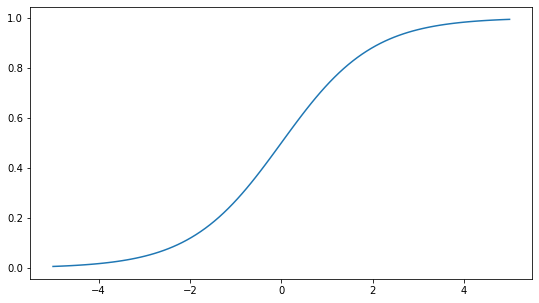

In [6]:
fig, ax = plt.subplots(figsize  =(9, 5))

x_grid = np.linspace(-5, 5, 100)
f = lambda x:1/(1 + np.exp(-x))
ax.plot(x_grid, f(x_grid));

It is convenient to code the two-class $g_i$ via a $0/1$ response $y_i$, where $y_i = 1$ when $g_i = 1$, and $y_i = 0$ when $g_i = 2$. Let $p_1(x; θ) = p(x; θ)$, and $p_2(x; θ) = 1 − p(x; θ)$. This means that $y_i$ ~ $Bern(p(x_i; θ))$

$$p_{g_i}(x_i;\theta)= p(x_i;\theta)^{y_i}\;(1-p(x_i;\theta))^{(1 - y_i)}$$

Where $p_{g_i}(x_i;\theta)$ is $PMF$ of $y_i$

An example if $y_i = 1$, $g_i = 1$, and using $PMF$ we can compute $p_{1}(x_i;\theta)= p(x_i;\theta)$, we can see meet our suppose above given.


Pugging in likehood

$$l(\theta) = \sum_{i=1}^{N}log \;p(x_i;\theta)^{y_i}\;(1-p(x_i;\theta))^{(1 - y_i)} $$

$$l(\theta) = \sum_{i=1}^{N} y_i\; log \;p(x_i;\theta) + (1 - y_i)\;log(1-p(x_i;\theta)) $$

$$\sum_{i=1}^{N} y_i(β_{10} + B_1^{T}x_i) − log(1 + e^{β_{10} + B_1^{T}x_i} )$$

If we assume that the vector of inputs $x_i$ includes the constant term 1 to accommodate the intercept, $\beta = (\beta_{10}, \beta_1^T )$ 

To maximize the log-likelihood, we set its derivatives to zero. These score equations are

$$\frac{∂l(\theta)}{∂\beta} = \sum_{i=1}^{N} x_i(y_i − p(x_i; β)) = 0$$


which are $p+ 1$ equations nonlinear in $\beta$

To solve the score equations we use the Newton–Raphson algorithm, which requires the second-derivative or Hessian matrix

$$ \frac{∂^2l(\beta)}{∂\beta∂\beta^T} = - \sum_{i=1}^{N} x_ix_i^T p(x_i; β)(1 − p(x_i; β))$$

Starting with $β_{old}$, a single Newton update is

$$β_{new} = β_{old} - (\frac{∂^2l(\beta)}{∂\beta∂\beta^T})^{-1}\frac{∂l(\theta)}{∂\beta}$$

### L1 Regularized Logistic Regression

The $L_1$ penalty can be used to maximize a penalized version 

$$max_{\beta_{10}, \beta_{1}^T}\{ \sum_{i=1}^{N} y_i(β_{10} + B_1^{T}x_i) − log(1 + e^{β_{10} + B_1^{T}x_i} ) - \lambda \sum_{j=1}^{p}|\beta_j| \}$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import model_selection, metrics
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [ ]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])
y = np.array(data_drime[target])

X_norm = (X - X.mean(axis=0, keepdims=True))/X.std(axis=0, keepdims=True)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                X_norm, y, test_size=0.25)
logit_model = LogisticRegression(solver='newton-cg')
logit_model.fit(X_train, y_train)

In [48]:
utils_metrics.assessment(y_test, X_test, logit_model)
utils_metrics.prob_cond_pred(y_test, X_test, logit_model)
utils_metrics.prob_cond_out(y_test, X_test, logit_model)

The accuracy 0.7243
Initial AUC value is 0.6703

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.32%
> P(not committed a crime|high risk)  20.00%
> P(committed a crime|low risk)       27.68%
> P(committed a crime|high risk)      80.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.59%
> P(high risk|not committed a crime)  0.41%
> P(low risk|committed a crime)       95.88%
> P(high risk|committed a crime)      4.12%



## Cross Validation for Logit

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
scaler = StandardScaler()

fit_to_grid_cv = model_selection.GridSearchCV(
    # estimator=Pipeline(steps=[("scaler", scaler),\
    #     ("logistic", LogisticRegression( class_weight="balanced",solver='liblinear'))]),
    estimator = LogisticRegression(solver='liblinear'),#  class_weight="balanced"
    scoring= 'roc_auc',
    cv=5,
    param_grid={
        'penalty': ["l1", "l2"],
        'C': np.linspace(0.1,1, 10)}, 
    verbose=False,
    return_train_score=True
)

fit_to_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=False)

In [23]:
logit_model = LogisticRegression(solver='liblinear', C=0.02, penalty="l2")
logit_model.fit(X_train, y_train)

utils_metrics.assessment(y_test, X_test, logit_model)
utils_metrics.prob_cond_pred(y_test, X_test, logit_model)
utils_metrics.prob_cond_out(y_test, X_test, logit_model)

The accuracy 0.7258
Initial AUC value is 0.4437

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.93%
> P(not committed a crime|high risk)  66.67%
> P(committed a crime|low risk)       27.07%
> P(committed a crime|high risk)      33.33%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.20%
> P(high risk|not committed a crime)  0.80%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%



### Statistical Significance Testing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import model_selection, metrics
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [ ]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])
y = np.array(data_drime[target])

The `old model` is defined by normalization on features and the `new model` is defined by the generation of the polynomios of the normalized features

In [ ]:
# [OLD MODEL] Normalization 
X_norm = (X - X.mean(axis=0, keepdims=True))/X.std(axis=0, keepdims=True)

# [NEW MODEL] Generating polynomial and interaction features 
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_norm)

In [ ]:
def f1_test_data_model(X:np.ndarray):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
                X, y, test_size=0.25)
    logit_model = LogisticRegression(solver='newton-cg')
    logit_model.fit(X_train, y_train)
    f1 = f1_score(y_test, logit_model.predict(X_test))
    return f1, y_test, X_test, logit_model

In [ ]:
f1_old, y_test_old, X_test_old, lm_old = f1_test_data_model(X_norm)
f1_new, y_test_new, X_test_new, lm_new = f1_test_data_model(X_poly)
δ_inint = f1_new - f1_old
print("\u03B4: ",δ_inint)

δ:  0.0861244019138756


The $\delta_\text{init}$ score was computed using $(y_{test}^{new}, X_{test}^{new})$ and $(y_{test}^{old}, X_{test}^{old})$
$$\delta_\text{init} = F_{1}^\text{new} - F_{1}^\text{old} = 0.077185$$

The hypothesis are $$H_0: \delta<=0$$ $$H_1: \delta>0$$

Given this dataset we resample it using *bootstrap technique*. This process will result in a distribution of $\delta$. With this distribution we can calculate the $\text{p-value}$ 

In [ ]:
def f1_score_by_idx_model(X, y, idx, model):
    predict = model.predict(X[idx,:])
    return f1_score(y, predict)

In [ ]:
# size of the dataset
size = len(X_test_new)
f1_score_boots = []
x = 0
while x < 1000:
    # resampling of the dataset with replacement
    idx = np.random.choice(range(size), size, replace=True)
    
    # compute the f_1 score having as an input the ressampling dataset
    f1_score_boots_new = f1_score_by_idx_model(X_test_new, y_test_new, idx, lm_new)
    f1_score_boots_old = f1_score_by_idx_model(X_test_old, y_test_old, idx, lm_old)
    f1_score_boots.append({
        'f1_score_boots_new': f1_score_boots_new,
        'f1_score_boots_old': f1_score_boots_old
    })
    x += 1


In [ ]:
# convert to dataframe
df_f1_score_boots = pd.DataFrame(f1_score_boots)
# calculate the δ
δ = df_f1_score_boots.eval('f1_score_boots_new - f1_score_boots_old')

The resampling was generate under $\delta_\text{init}>0$, but to compute the $\text{p-value}$ we need to keep as true the $h_0$, that is, $\delta<=0$, but $\delta_\text{init}$ point out the otherwise, so we need to transform (only by localization) the $\delta$ generade by resampling

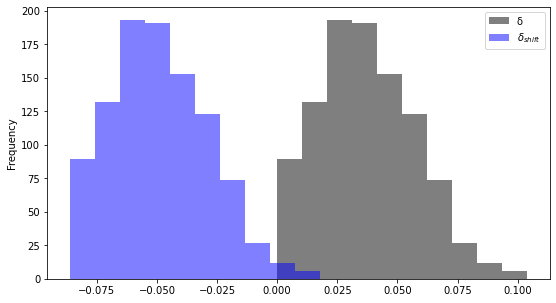

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
δ.plot(kind='hist', ax =ax , color = 'k', alpha = 0.5, label = 'δ')
δ_shift = δ - δ_inint
δ_shift.plot(kind='hist', ax =ax, color = 'b', alpha = 0.5, label = r'$δ_{shift}$')
plt.legend()

In [ ]:
print("p-value: " ,f"{np.mean(δ_shift>δ_inint):.2%}")

p-value:  0.00%


with $\text{p-value}=0\%$  we can reject the null hypothesis and conclude new is better than old

Resources:

* The Elements of Statistical Learning Data Mining, Inference, and Prediction - Second Edition - Trevor Hastie - Robert Tibshirani - Jerome Friedman. Springer.

* Data Page: https://hastie.su.domains/ElemStatLearn/
